In [1]:
import pytorch_lightning as pl
from trainAgg import OnexOneAggregationModule
from util import my_collate
import util
import data_factory
import numpy as np
import torch
from config import cfg
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy import stats

In [2]:
#model = aggregationModule.load_from_checkpoint('/u/pop-d1/grad/cgar222/Projects/disaggregation/aggregation/lightning_logs/version_65/checkpoints/epoch=4-step=2504.ckpt')

In [3]:
this_dataset = util.make_dataset(mode = 'train')

Reading GeoDataFrame...
Done
Generating list of useful chips


100%|██████████| 3536/3536 [00:01<00:00, 1860.55it/s]


Loading all values...


3009


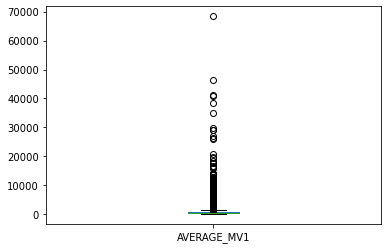

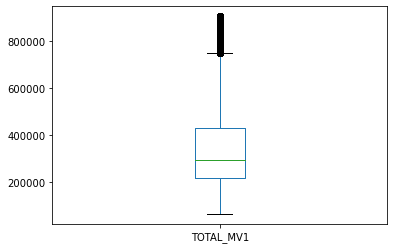

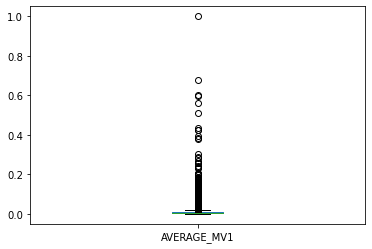

In [4]:
gdf = this_dataset.getgdf()

#print(gdf.keys().values,  sep='\n')
#plt.gca().set(title='Frequency Histogram of Diamond Depths', ylabel='Frequency')
plt.figure()
gdf['AVERAGE_MV1'].plot.box()
plt.savefig('/u/pop-d1/grad/cgar222/Projects/disaggregation/Plots/total_mv1.png')
values=  gdf['AVERAGE_MV1']
#gdf = gdf[gdf['TOTAL_MV1'].between(gdf['TOTAL_MV1'].quantile(0.1), gdf['TOTAL_MV1'].quantile(0.9))]
plt.figure()
gdf['TOTAL_MV1'].plot.box()
#gdf['TOTAL_MV1'].plot.hist()
#values = values[values.between(values.quantile(0.1), values.quantile(0.9))]
values = (values - min( values )) / (max( values ) - min(values))
#values = values.where(values > 0)
#values = values.where(values < 10**6)
plt.figure()
values.plot.box()
plt.savefig('/u/pop-d1/grad/cgar222/Projects/disaggregation/Plots/total_mv1_fixed.png')
#print(gdf['TOTAL_MV1'].mean())
#plt.hist(gdf['SALE_PRICE'].values, bins=50)s

print(len(this_dataset))

In [5]:
this_dataset[0]

{'image': tensor([[[0.6157, 0.6392, 0.4510,  ..., 0.5216, 0.4941, 0.6588],
          [0.7098, 0.6980, 0.7059,  ..., 0.5255, 0.5176, 0.6392],
          [0.6471, 0.5765, 0.5843,  ..., 0.5176, 0.5059, 0.6392],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.5529, 0.7098, 0.7451],
          [0.0000, 0.0000, 0.0000,  ..., 0.5765, 0.4039, 0.4431],
          [0.0000, 0.0000, 0.0000,  ..., 0.4000, 0.5451, 0.4314]],
 
         [[0.5020, 0.5255, 0.2941,  ..., 0.4392, 0.4118, 0.5882],
          [0.6039, 0.5882, 0.5804,  ..., 0.4471, 0.4353, 0.5686],
          [0.5333, 0.4549, 0.4471,  ..., 0.4353, 0.4235, 0.5686],
          ...,
          [0.0627, 0.0000, 0.0000,  ..., 0.4000, 0.5725, 0.6039],
          [0.0745, 0.0627, 0.0549,  ..., 0.4745, 0.2706, 0.3176],
          [0.0627, 0.0667, 0.0863,  ..., 0.2941, 0.4392, 0.3216]],
 
         [[0.4392, 0.4549, 0.2235,  ..., 0.4157, 0.3843, 0.5569],
          [0.5451, 0.5216, 0.5137,  ..., 0.4196, 0.4078, 0.5333],
          [0.4745, 0.3843, 0.37

In [6]:
import matplotlib as mpl
# lets get a batch and look at the cnn output

# https://stackoverflow.com/questions/51329159/how-can-i-generate-and-display-a-grid-of-images-in-pytorch-with-plt-imshow-and-t

with torch.no_grad(): 
    for batch in train_loader:
        image, parcel_masks, parcel_values = batch

        output = model.cnnOutput(image)
        plt.figure()
        # now we want to plot the images
        plt.imshow(  image[3].permute(1, 2, 0)  )
        plt.savefig('/u/pop-d1/grad/cgar222/Projects/disaggregation/Plots/image.png')
        plt.figure()
        
        # plot the outputs
        plt.imshow(  output[3].permute(1, 2, 0), cmap="YlGn")#, norm=mpl.colors.LogNorm()  )
        plt.colorbar()
        plt.savefig('/u/pop-d1/grad/cgar222/Projects/disaggregation/Plots/output.png')
        break   



NameError: name 'train_loader' is not defined